In [1]:
import numpy as np
from numpy import median
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("../input/swedishcrime/reported.csv", parse_dates=["Year"])

# **Exploring the Crime Rate in Sweden**

## Intro
This dataset is about swedish crime statistics from 1950 to 2015.

The meaning of columns is:
* crimes.total: total number of reported crimes
<br>

* **crimes.penal.code: total number of reported crimes against the criminal code**
    * crimes.person: total number of reported crimes against a person
    * murder: total number of reported murder
    * sexual.offences: total number of reported sexual offences
    * rape: total number of reported rapes
    * assault: total number of reported aggravated assaults
    
<br>

* **stealing.general: total number of reported crimes involving stealing or robbery**
    * robbery: total number of reported armed robberies
    * burglary: total number of reported armed burglaries
    * vehicle.theft: total number of reported vehicle thefts
    * house.theft: total number of reported theft inside a house
    * shop.theft: total number of reported theft inside a shop
    * out.of.vehicle.theft: total number of reported theft from a vehicle

<br>

* criminal.damage: total number of reported criminal damages
* other.penal.crimes: number of other penal crime offenses
* fraud: total number of reported frauds
* narcotics: total number of reported narcotics abuses
* drunk.driving: total number of reported drunk driving incidents


# **Questions and Goal of Analysis**

* **1. Has the crime rate in sweden increased over the years?**
* **2. What kind of crimes have ben increased rapidly since 2000?**
* **3. Is there a good news?**



In [3]:
df.head()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,house.theft,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950-01-01,2784,2306,120,1,105,40,5,1578,295,NaN,NaN,NaN,NaN,3,209,72,477,0.00,49,7014000
1,1951-01-01,3284,2754,125,1,109,45,6,1899,342,NaN,NaN,NaN,NaN,3,310,73,530,0.00,66,7073000
2,1952-01-01,3160,2608,119,1,104,39,4,1846,372,NaN,NaN,NaN,NaN,3,217,82,553,0.00,78,7125000
3,1953-01-01,2909,2689,119,1,105,45,5,1929,361,NaN,NaN,NaN,NaN,4,209,88,220,0.00,91,7171000
4,1954-01-01,3028,2791,126,1,107,41,5,1981,393,NaN,NaN,NaN,NaN,4,236,101,237,0.00,103,7213000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  66 non-null     datetime64[ns]
 1   crimes.total          66 non-null     int64         
 2   crimes.penal.code     66 non-null     int64         
 3   crimes.person         66 non-null     int64         
 4   murder                66 non-null     int64         
 5   assault               66 non-null     int64         
 6   sexual.offenses       66 non-null     int64         
 7   rape                  66 non-null     int64         
 8   stealing.general      66 non-null     int64         
 9   burglary              66 non-null     int64         
 10  house.theft           51 non-null     float64       
 11  vehicle.theft         59 non-null     float64       
 12  out.of.vehicle.theft  51 non-null     float64       
 13  shop.theft            

In [5]:
df.describe()

,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,house.theft,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
count,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,51.00,59.00,51.00,51.00,66.00,66.00,66.00,66.00,62.00,66.00,66.00
mean,"10,084.26","8,695.18",451.29,1.76,423.11,75.32,20.05,"5,580.55","1,240.68",210.53,466.29,"1,192.57",540.29,48.06,730.64,879.48,"1,383.30",386.63,225.76,"8,341,848.48"
std,"4,223.89","3,582.15",295.04,0.72,281.84,48.14,19.15,"2,089.33",456.70,48.68,193.70,432.54,185.30,35.41,395.30,605.27,717.52,307.13,66.35,"717,935.12"
min,"2,784.00","2,306.00",119.00,1.00,104.00,29.00,4.00,"1,578.00",295.00,99.00,135.00,542.00,123.00,3.00,209.00,72.00,220.00,0.00,49.00,"7,014,000.00"
25%,"6,152.50","5,336.00",185.25,1.00,167.75,41.00,8.00,"3,786.75",918.25,187.00,339.50,753.50,379.00,13.25,476.50,301.25,816.75,201.25,178.00,"7,823,000.00"
50%,"11,654.00","9,637.00",370.50,2.00,345.00,50.00,11.00,"5,928.00","1,331.00",211.00,419.00,"1,210.00",606.00,42.00,640.00,818.00,"1,465.00",350.00,238.00,"8,327,000.00"
75%,"13,663.75","12,002.50",690.50,2.00,658.00,97.00,23.00,"7,444.50","1,653.25",245.50,660.50,"1,580.00",695.00,83.50,"1,080.25","1,351.50","1,776.50",539.25,272.50,"8,856,250.00"
max,"15,342.00","12,803.00","1,005.00",4.00,947.00,210.00,69.00,"8,650.00","1,878.00",296.00,882.00,"1,869.00",807.00,104.00,"1,896.00","2,175.00","2,721.00","1,002.00",337.00,"9,851,000.00"


## **Has the crime rate in sweden increased over the years?**

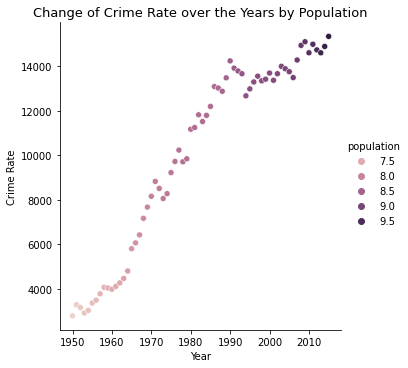

In [6]:
sns.relplot(data=df, x='Year', y='crimes.total', hue='population')

plt.title('Change of Crime Rate over the Years by Population', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

This shows clearly that the crime rate has been increased over the years with the growth of population.

In [7]:
cen_21 = df.iloc[-16:]

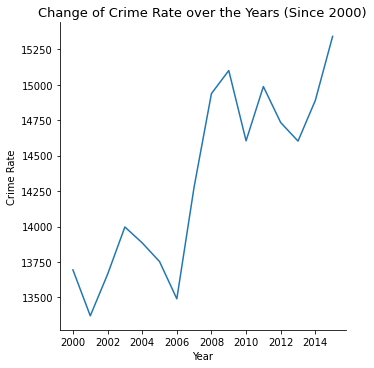

In [8]:
sns.relplot(data=cen_21, x='Year', y='crimes.total', kind='line')

plt.title('Change of Crime Rate over the Years (Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

## **Answer**

#### **1. Crime aganist Person**

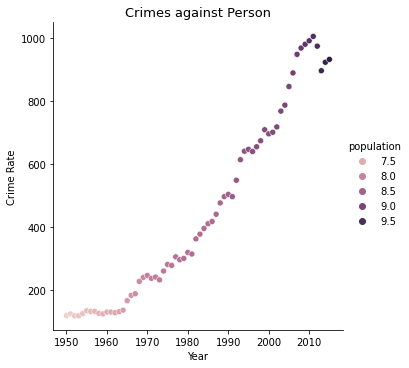

In [9]:
sns.relplot(data=df, x='Year', y='crimes.person', hue='population')

plt.title('Crimes against Person', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

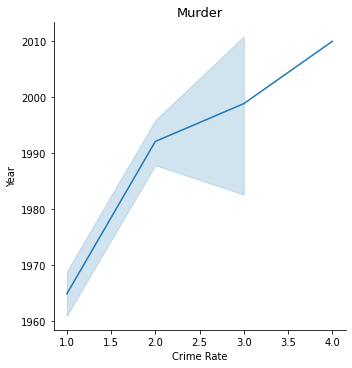

In [10]:
sns.relplot(data=df, y='Year', x='murder', kind='line')

plt.title('Murder', size=13)
plt.ylabel("Year", size=10)
plt.xlabel("Crime Rate", size=10)

plt.show()

#### **2. Murder**

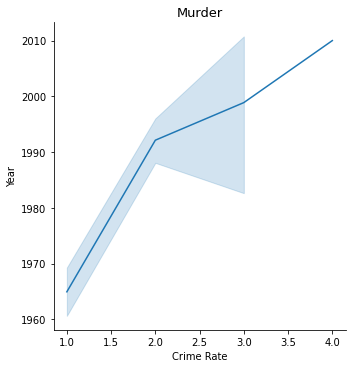

In [11]:
sns.relplot(data=df, y='Year', x='murder', kind='line')

plt.title('Murder', size=13)
plt.ylabel("Year", size=10)
plt.xlabel("Crime Rate", size=10)

plt.show()

#### **3. Assault**

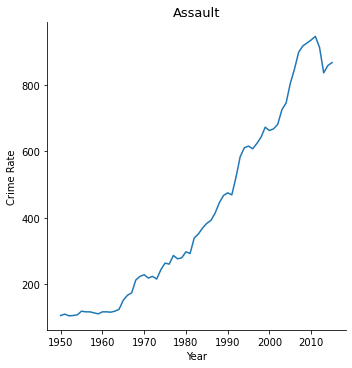

In [12]:
sns.relplot(data=df, x='Year', y='assault', kind='line')

plt.title('Assault', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

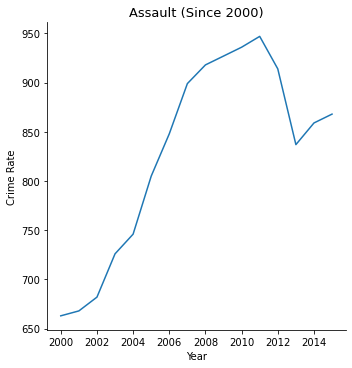

In [13]:
sns.relplot(data=cen_21, x='Year', y='assault', kind='line')

plt.title('Assault (Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **4. Sexual Offenses**

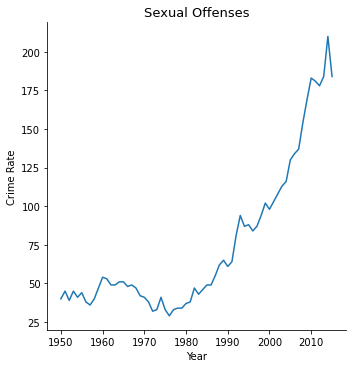

In [14]:
sns.relplot(data=df, x='Year', y='sexual.offenses', kind='line')

plt.title('Sexual Offenses', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **5. Rape**

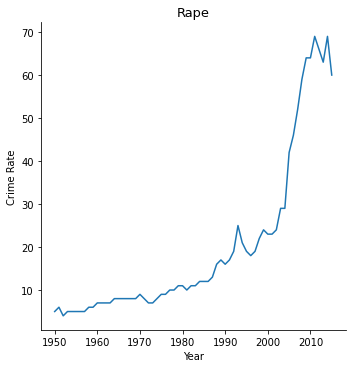

In [15]:
sns.relplot(data=df, x='Year', y='rape', kind='line')

plt.title('Rape', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

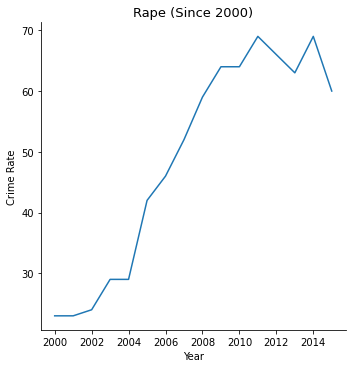

In [16]:
sns.relplot(data=cen_21, x='Year', y='rape', kind='line')

plt.title('Rape (Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **6. Stealing general**

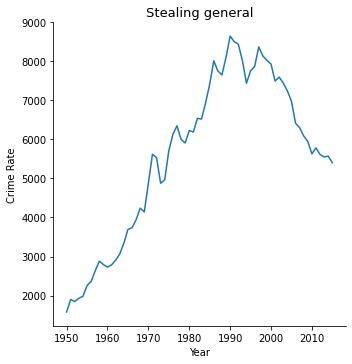

In [17]:
sns.relplot(data=df, x='Year', y='stealing.general', kind='line')

plt.title('Stealing general', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

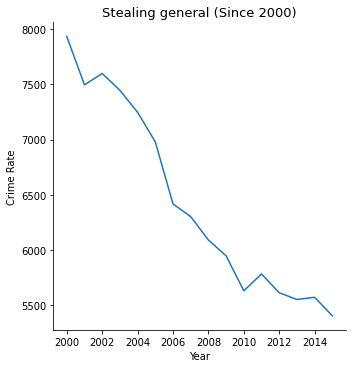

In [18]:
sns.relplot(data=cen_21, x='Year', y='stealing.general', kind='line')

plt.title('Stealing general (Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **7. Fraud**

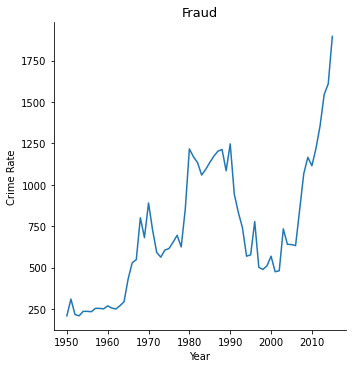

In [19]:
sns.relplot(data=df, x='Year', y='fraud', kind='line')

plt.title('Fraud', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

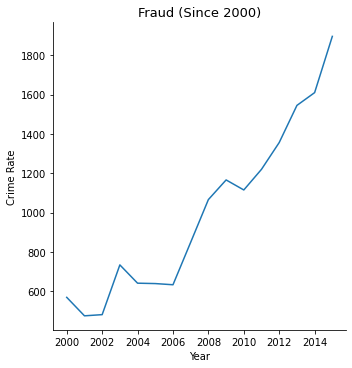

In [20]:
sns.relplot(data=cen_21, x='Year', y='fraud', kind='line')

plt.title('Fraud (Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **8. Criminal Damage**

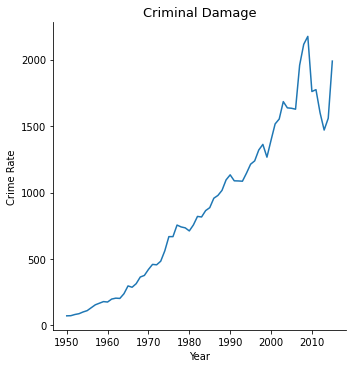

In [21]:
sns.relplot(data=df, x='Year', y='criminal.damage', kind='line')

plt.title('Criminal Damage', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

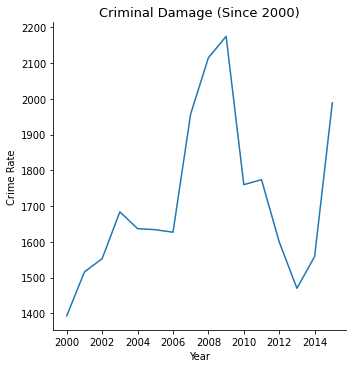

In [22]:
sns.relplot(data=cen_21, x='Year', y='criminal.damage', kind='line')

plt.title('Criminal Damage (Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **9. Other Penal Crimes**

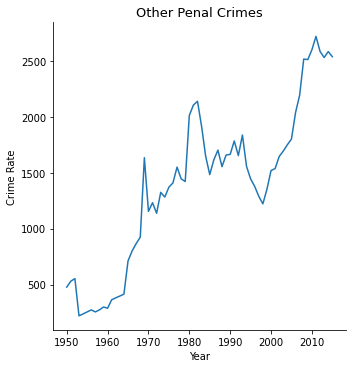

In [23]:
sns.relplot(data=df, x='Year', y='other.penal.crimes', kind='line')

plt.title('Other Penal Crimes', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **10. Narcotics (Drug)**

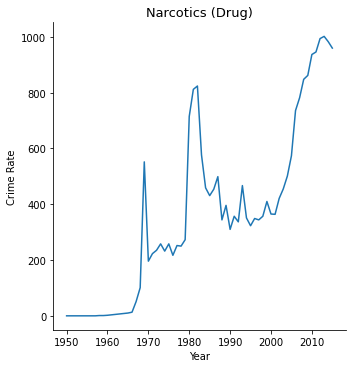

In [24]:
sns.relplot(data=df, x='Year', y='narcotics', kind='line')

plt.title('Narcotics (Drug)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

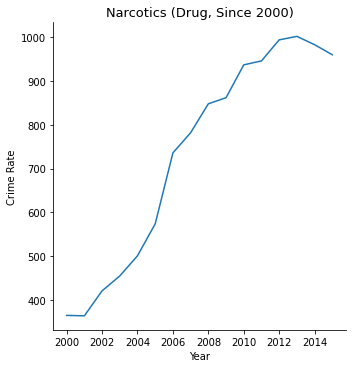

In [25]:
sns.relplot(data=cen_21, x='Year', y='narcotics', kind='line')

plt.title('Narcotics (Drug, Since 2000)', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

#### **10. Drunk Driving**

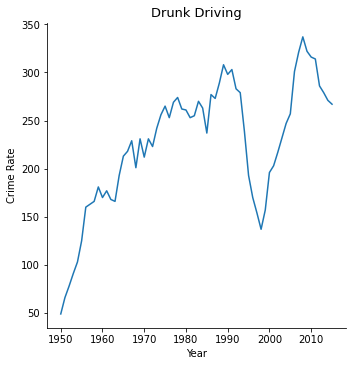

In [26]:
sns.relplot(data=df, x='Year', y='drunk.driving', kind='line')

plt.title('Drunk Driving', size=13)
plt.xlabel("Year", size=10)
plt.ylabel("Crime Rate", size=10)

plt.show()

# **Conclusion**

1. Has the crime rate in sweden increased over the years?
    * Since 1950, the crime rate has been increased with the growth of population.
    

2. What kind of crimes have ben increased rapidly since 2000?
    * Almost all kind of crimes have been increased but espacially the crimes about rape, frau and drug have been rapidly increased since 2000.


3. Is there a good news?
    * The crime about stealing in general is the only part, which has been decreased since 2000.